In [1]:
# Loss picture compare in 2 epoch
# baseline: tsn & ccsn & sen
# and tripletSiameseNetWithRNN
# the tsn loss is not softmax, so not compare tsn-loss

In [2]:
with open("./baseline/TSN/baseline_tsn_meanloss.txt","r") as file:
    tsn_loss = file.readlines()
tsn_loss = [float(x.strip()) for x in tsn_loss] 
# print(tsn_loss[0],len(tsn_loss)) 

with open("./baseline/CCSN/baseline_ccsn_meanloss.txt","r") as file:
    ccsn_loss = file.readlines()
ccsn_loss = [float(x.strip()) for x in ccsn_loss] 
# print(ccsn_loss[0],len(ccsn_loss)) 

with open("./baseline/SEN/baseline_sen_meanloss.txt","r") as file:
    sen_loss = file.readlines()
sen_loss = [float(x.strip()) for x in sen_loss] 
# print(sen_loss[0],len(sen_loss)) 

with open("./cal_mean_loss_list_LSTM.txt","r") as file:
    lstm_loss = file.readlines()
lstm_loss = [float(x.strip()) for x in lstm_loss] 
lstm_loss = lstm_loss[:2250]
# print(lstm_loss[0],len(lstm_loss)) 

X = []
for i in range(len(tsn_loss)):
    X.append(i)
for i in range(len(tsn_loss)):
    X.append(i)
for i in range(len(tsn_loss)):
    X.append(i)

Y = []
for i in ccsn_loss:
    Y.append(i)
for i in sen_loss:
    Y.append(i)
for i in lstm_loss:
    Y.append(i)

## the tsn loss is not softmax, so not compare tsn-loss
label = []
for i in range(3*len(tsn_loss)):
    if(i < len(tsn_loss)):
        label.append("CCSN")
    elif(i >= len(tsn_loss) and i < 2*len(tsn_loss)):
        label.append("SEN")
    else:
        label.append("TSN-R")
        
print(len(X),len(Y),len(label))

6750 6750 6750


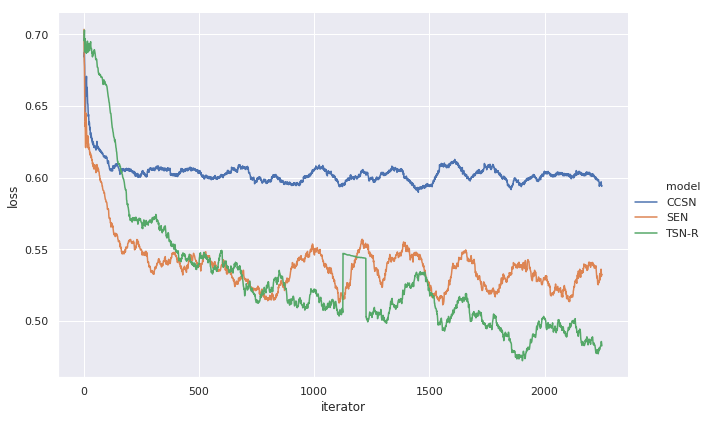

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

lossdf = pd.DataFrame(X,columns=["iterator"])
lossdf["loss"] = Y
lossdf["model"] = label
# print(lossdf.head(5))

#when the iterator==1250, one epoch over
sns.set()
ax = sns.relplot(x="iterator", y="loss", hue="model",
                data=lossdf,
                ci=None,
                kind="line",
                 height=6,aspect=1.5,
                )

In [7]:
# exact feature in the second layer from the end of the model
# which has 1024 units as the output feature

#1.firstly  load the feature
#2.secondly PCA to reduce the number of dimensions
#3.finally use sklearn.TSNE to visualize high-dimensional data

In [12]:
import numpy as np
sen_X_embedded = np.load("./util/SEN_feature.npy")
lstm_X_embedded = np.load("./util/TSN-R_feature.npy")

In [13]:
import time
import pandas as pd
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

sen_pcamodel = PCA(n_components=20)
sen_X_embedded_PCA = sen_pcamodel.fit_transform(sen_X_embedded)
print("SEN=20 components repaly the feature is {}".format(np.sum(sen_pcamodel.explained_variance_ratio_)))
tsne = TSNE(n_components=2, verbose=0, perplexity=30, n_iter=300)
sen_embedded  = tsne.fit_transform(sen_X_embedded_PCA)
print(sen_embedded.shape)


lstm_pcamodel = PCA(n_components=20)
lstm_X_embedded_PCA = lstm_pcamodel.fit_transform(lstm_X_embedded)
print("TSN-R=20 components repaly the feature is {}".format(np.sum(lstm_pcamodel.explained_variance_ratio_)))
tsne = TSNE(n_components=2, verbose=0, perplexity=30, n_iter=1000)
lstm_embedded  = tsne.fit_transform(lstm_X_embedded_PCA)
print(lstm_embedded.shape)


SEN=20 components repaly the feature is 0.9913191859239608
(3200, 2)
TSN-R=20 components repaly the feature is 0.9984076364821575
(5000, 2)


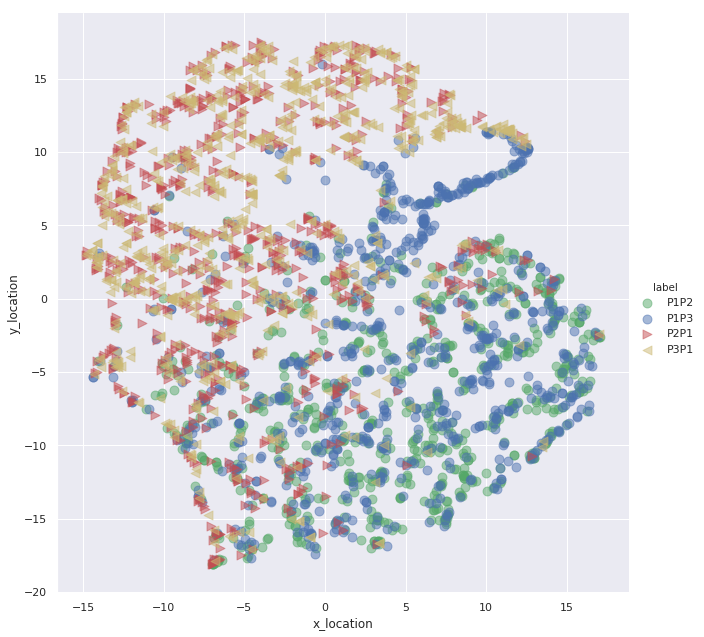

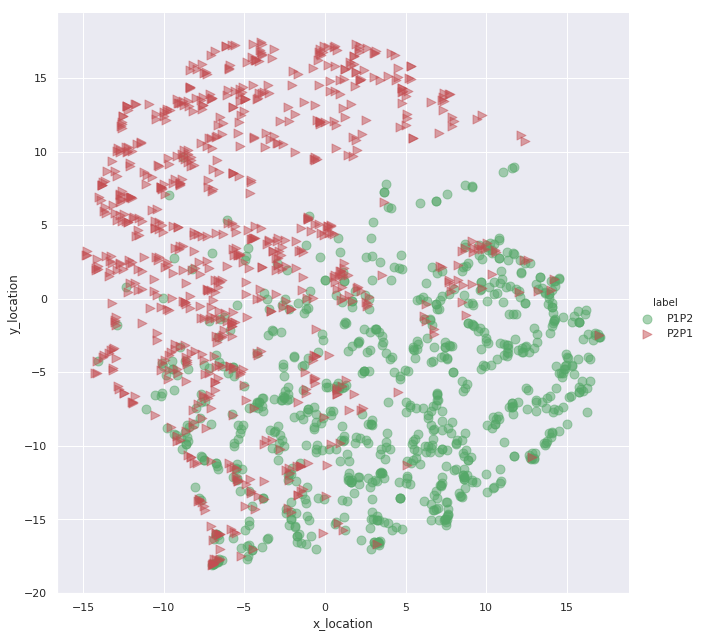

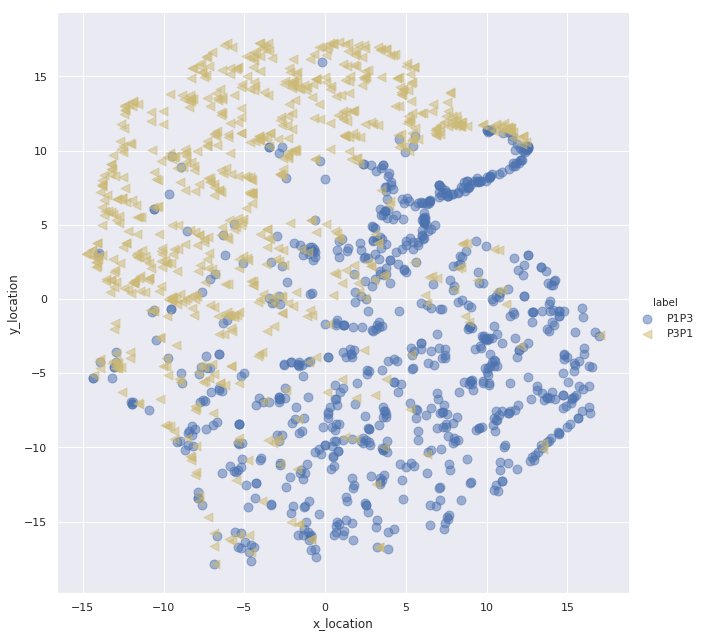

In [18]:
###############################  SEN  model classify #############
with open("./util/sen_Y_embedded.txt") as file:
    sen_Y_embedded = file.readlines()
sen_Y_embedded = [token.strip() for token in sen_Y_embedded]

df_sen = pd.DataFrame(sen_embedded,columns=["x_location","y_location"])
df_sen["label"] = sen_Y_embedded


sns.set()
mydict = {"P1P2":"g", "P2P1":"r","P1P3":"b","P3P1":"y"}
markers=["o", "o", ">","<"]
sns.lmplot(x='x_location',
           y='y_location',
           data=df_sen,
           fit_reg=False,
           legend=True,
           truncate=True,
           markers=markers,
           height=9,
           hue='label',
           palette=mydict,
           scatter_kws={"s":80, "alpha":0.5})



mydict = {"P1P2":"g", "P2P1":"r"}
df_sen1 = df_sen.loc[(df_sen['label'] != "P1P3") & (df_sen['label'] != "P3P1")]
markers=["o", ">"]
sns.lmplot(x='x_location',
           y='y_location',
           data=df_sen1,
           fit_reg=False,
           legend=True,
           truncate=True,
           markers=markers,
           height=9,
           hue='label',
           palette=mydict,
           scatter_kws={"s":80, "alpha":0.5})


mydict = {"P1P3":"b","P3P1":"y"}
df_sen2 = df_sen.loc[(df_sen['label'] != "P1P2") & (df_sen['label'] != "P2P1")]
markers=[ "o","<"]
sns.lmplot(x='x_location',
           y='y_location',
           data=df_sen2,
           fit_reg=False,
           legend=True,
           truncate=True,
           markers=markers,
           height=9,
           hue='label',
           palette=mydict,
           scatter_kws={"s":80, "alpha":0.5})

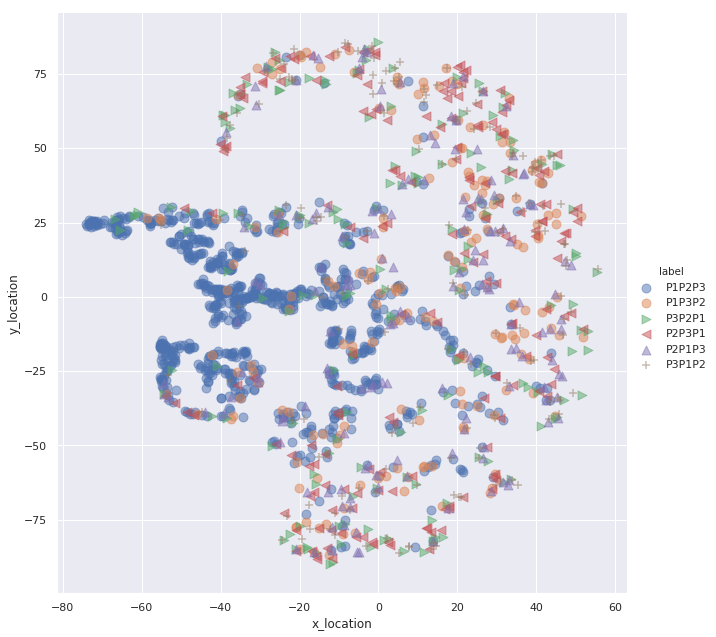

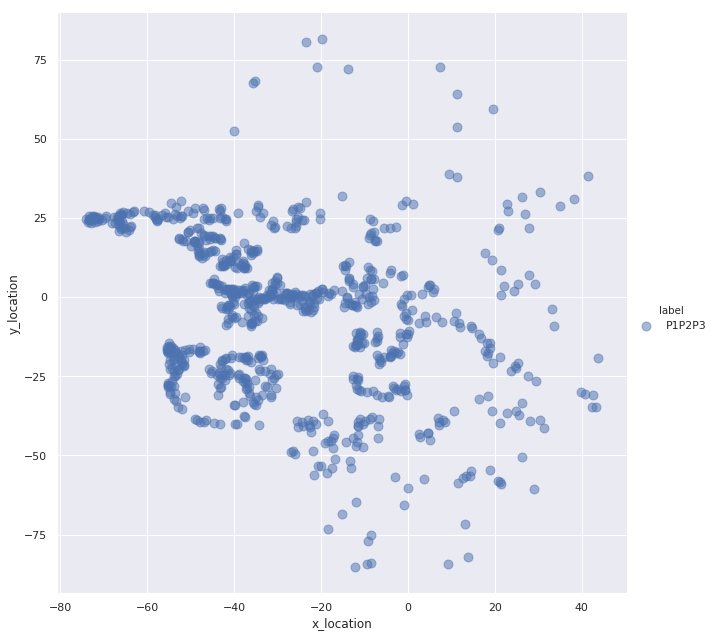

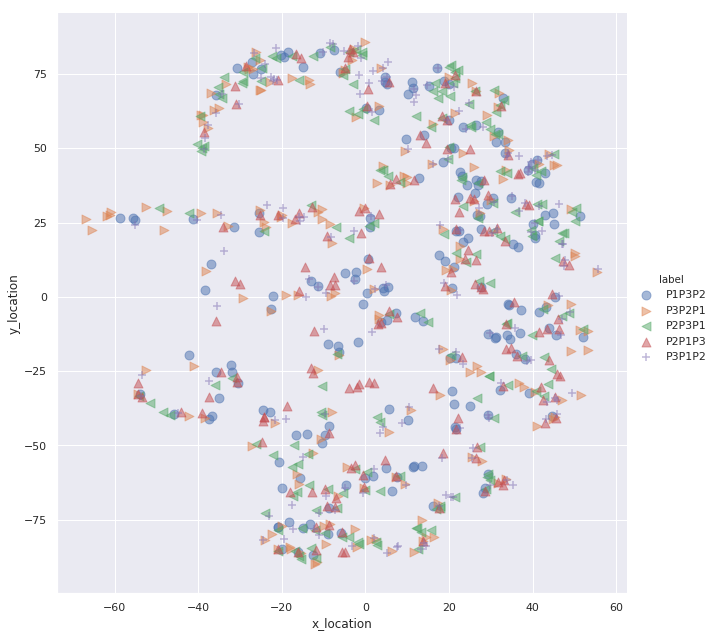

In [20]:
###############################  TSN-R model classify #############
with open("./util/tsn-R_Y_embedded.txt") as file:
    lstm_Y_embedded = file.readlines()
lstm_Y_embedded = [token.strip() for token in lstm_Y_embedded]

df_lstm = pd.DataFrame(lstm_embedded,columns=["x_location","y_location"])
df_lstm["label"] = lstm_Y_embedded


sns.set()
df_new1 = df_lstm.loc[(df_lstm['label'] == "P1P2P3")]
df_new2 = df_lstm.loc[(df_lstm['label'] != "P1P2P3")]
msk = np.random.rand(len(df_new2)) < 0.2
df_new2 = df_new2[msk]

df_new3 = df_new1.append(df_new2)
markers=["o", "o", ">","<","^","+"]
sns.lmplot(x='x_location',
           y='y_location',
           data=df_new3,
           fit_reg=False,
           legend=True,
           truncate=True,
           markers=markers,
           height=9,
           hue='label',
#            palette=mydict,
           scatter_kws={"s":80, "alpha":0.5})

df_new4 = df_new3.loc[(df_new3['label'] == "P1P2P3")]
sns.lmplot(x='x_location',
           y='y_location',
           data=df_new4,
           fit_reg=False,
           legend=True,
           truncate=True,
#            markers=markers,
           height=9,
           hue='label',
#            palette=mydict,
           scatter_kws={"s":80, "alpha":0.5})

markers=["o", ">","<","^","+"]
df_new5 = df_new3.loc[(df_new3['label'] != "P1P2P3")]
sns.lmplot(x='x_location',
           y='y_location',
           data=df_new5,
           fit_reg=False,
           legend=True,
           truncate=True,
           markers=markers,
           height=9,
           hue='label',
#            palette=mydict,
           scatter_kws={"s":80, "alpha":0.5})
